
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        pass

    def transform(self, X):
        pass

    def fit_transform(self, X):
        pass


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass


In [ ]:
#IMP!!
# RUN MY CODE IN GOOGLE COLAB ONLY AS WHEN I WAS TRYING TO RUN IT LOCALLY ON VSCODE IT WAS GIVING ME ERRORS (sorry for the inconvenience)

Iteration 0: Loss 25.6033
Iteration 100: Loss 0.3413
Iteration 200: Loss 0.3413
Iteration 300: Loss 0.3413
Iteration 400: Loss 0.3413

Final Weights: [2.09085435]
Final Bias: 6.760905766941992


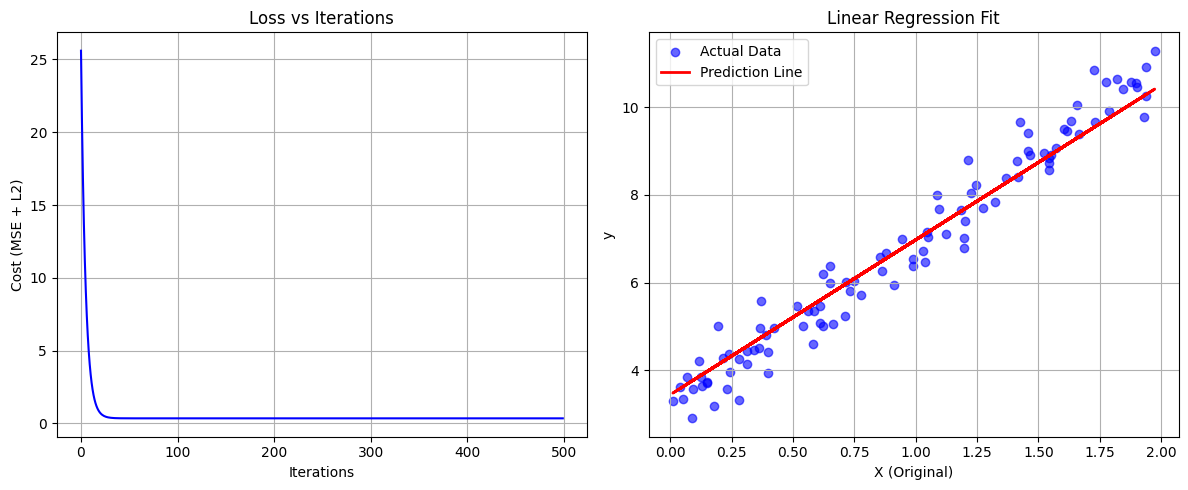


 Verification
Recovered Slope (should be ~4): 3.5319
Recovered Intercept (should be ~3): 3.4397


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MyStandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        # Compute mean and std for each feature (column)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        # Handle zero standard deviation to avoid division by zero
        self.std[self.std == 0] = 1.0

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted yet.")
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


#2 & 3. Linear Regression with Gradient Descent & L2 Regularization
class RidgeRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_=0.1):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.lambda_ = lambda_  # Regularization strength
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples,n_features= X.shape

        # Initialize parameters
        self.weights=np.zeros(n_features)
        self.bias=0
        self.loss_history=[]

        for i in range(self.n_iterations):
            # 1. Forward pass (Prediction)
            y_predicted=np.dot(X,self.weights)+self.bias

            # 2. Compute Gradient Gradient for weights: (1/m) * X.T * (y_pred - y) + (lambda * w)
            error=y_predicted - y
            dw=(1/n_samples)*np.dot(X.T, error)+(self.lambda_*self.weights)
            db=(1/n_samples)*np.sum(error) # Bias is NOT regularized

            # 3. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # 4. Compute and record Loss (MSE + L2 Penalty)
            # Cost = (1/2m) * sum(error^2) + (lambda/2) * sum(w^2)
            mse_loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
            l2_penalty = (self.lambda_ / 2) * np.sum(self.weights ** 2)
            total_loss = mse_loss + l2_penalty

            self.loss_history.append(total_loss)

            if i % 100 == 0:
                print(f"Iteration {i}: Loss {total_loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# A. Generate Synthetic Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
true_weights = 4
true_bias = 3
noise = np.random.randn(100, 1) * 0.5
y = true_weights * X + true_bias + noise
y = y.flatten() # Flatten to make it a 1D vector

# B. Apply Manual Standardization
scaler = MyStandardScaler()
X_scaled = scaler.fit_transform(X)

# C. Train Model
# Using a small lambda (0.1) creates a slight regularization effect
model = RidgeRegressionGD(learning_rate=0.1, n_iterations=500, lambda_=0.1)
model.fit(X_scaled, y)

print(f"\nFinal Weights: {model.weights}")
print(f"Final Bias: {model.bias}")

# D. Predict
predictions = model.predict(X_scaled)

# --- 4. Plotting ---
plt.figure(figsize=(12, 5))

# Plot 1: Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='blue')
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + L2)')
plt.grid(True)

# Plot 2: True vs Predicted
plt.subplot(1, 2, 2)
# We plot against the original X to see the regression line naturally
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, predictions, color='red', label='Prediction Line', linewidth=2)
plt.title('Linear Regression Fit')
plt.xlabel('X (Original)')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


rec_slope=model.weights[0]/scaler.std[0]

# 2. Recover the Original Intercept (c = b_scaled - (m * mu))
rec_intercept=model.bias-(rec_slope*scaler.mean[0])

print("\n Verification")
print(f"Recovered Slope (should be ~4): {rec_slope:.4f}")
print(f"Recovered Intercept (should be ~3): {rec_intercept:.4f}")


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    pass


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass

    def fit(self, X, y):
        pass

    def predict_proba(self, X):
        pass

    def predict(self, X):
        pass


Epoch 0: Loss 0.6932
Epoch 100: Loss 0.2436
Epoch 200: Loss 0.2202
Epoch 300: Loss 0.2147
Epoch 400: Loss 0.2130
Epoch 500: Loss 0.2123
Epoch 600: Loss 0.2121
Epoch 700: Loss 0.2120
Epoch 800: Loss 0.2119
Epoch 900: Loss 0.2119

Final Accuracy: 93.00%


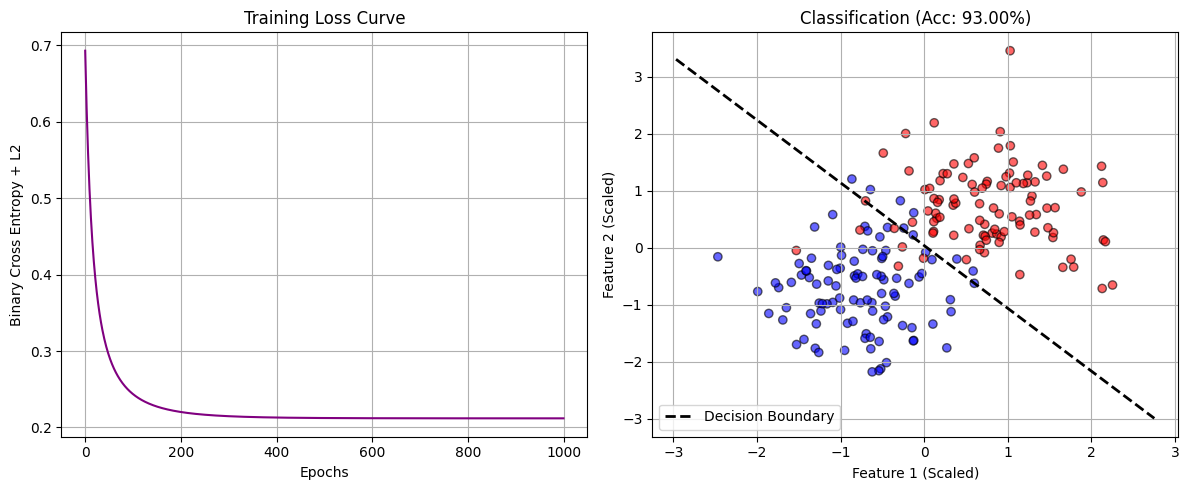

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#From Q1;
class MyStandardScaler:
    def __init__(self):
        self.mean=None
        self.std=None

    def fit(self, X):
        self.mean=np.mean(X, axis=0)
        self.std=np.std(X, axis=0)
        self.std[self.std == 0]=1.0

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted yet.")
        return (X-self.mean)/self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
def sigmoid(z):
    # Clip z to avoid overflow in exp for extreme values
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))

#Logistic Regression Class
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for i in range(self.epochs):
            # A. Linear Combination (z = Xw + b)
            linear_model = np.dot(X, self.weights) + self.bias

            # B. Activation (Sigmoid)
            y_pred = sigmoid(linear_model)

            # C. Compute Gradients
            error = y_pred - y

            # Gradient w/ Regularization: dw = (1/m) * X.T * (y_pred - y) + lambda * w
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(error)

            # D. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # E. Compute Loss (Binary Cross Entropy + L2 Penalty)
            # Add epsilon to log to prevent log(0) error
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            l2_penalty = (self.l2_lambda / 2) * np.sum(self.weights ** 2)

            total_loss = bce_loss + l2_penalty
            self.loss_history.append(total_loss)

            if i % 100 == 0:
                print(f"Epoch {i}: Loss {total_loss:.4f}")

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return [1 if p >= threshold else 0 for p in probabilities]
# A. Generate Synthetic Binary Data (Two blobs)
np.random.seed(42)
# Class 0: centered at (2, 2)
X1 = np.random.randn(100, 2) + np.array([2, 2])
# Class 1: centered at (4, 4)
X2 = np.random.randn(100, 2) + np.array([4, 4])

X = np.vstack((X1, X2))
y = np.array([0] * 100 + [1] * 100)

# B. Standardization
scaler = MyStandardScaler()
X_scaled = scaler.fit_transform(X)

# C. Train Model
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
model.fit(X_scaled, y)

# D. Evaluation
predictions = model.predict(X_scaled)
accuracy = np.mean(predictions == y)
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))

# Plot 1: Training Loss
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='purple')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy + L2')
plt.grid(True)

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', alpha=0.6, edgecolors='k')

# Calculate decision boundary line: w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
x1_min, x1_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5

# Avoid division by zero if weight[1] is 0
if model.weights[1] != 0:
    x2_boundary = - (model.weights[0] * np.array([x1_min, x1_max]) + model.bias) / model.weights[1]
    # This was the line causing the error:
    plt.plot([x1_min, x1_max], x2_boundary, "k--", linewidth=2, label="Decision Boundary")
else:
    print("Warning: Weight for feature 2 is zero, cannot plot boundary line.")

plt.title(f'Classification (Acc: {accuracy:.2%})')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


Centroids: [ 9.79230697 50.11152294 90.12979251]
Sample Cookbook (Cluster 0): [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]


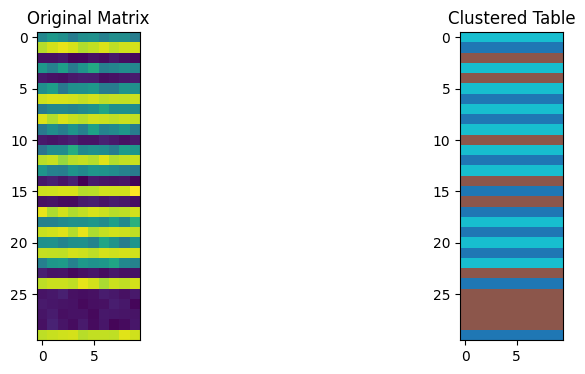

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class MatrixKMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.assignment_table = None
        self.cookbook = None

    def fit(self, M):
        n, m = M.shape
        data = M.flatten()

        # Init centroids randomly
        self.centroids = data[np.random.choice(len(data), self.k, replace=False)]

        for _ in range(self.max_iters):
            # Assignment: |x - c|
            distances = np.abs(data[:, np.newaxis] - self.centroids)
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.zeros(self.k)
            for i in range(self.k):
                points = data[labels == i]
                new_centroids[i] = np.mean(points) if len(points) > 0 else self.centroids[i]

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                self.centroids = new_centroids
                break
            self.centroids = new_centroids

        # Outputs
        self.assignment_table = labels.reshape(n, m)
        self.cookbook = {i: [] for i in range(self.k)}
        for r in range(n):
            for c in range(m):
                self.cookbook[self.assignment_table[r, c]].append((r, c))

        return self.assignment_table, self.cookbook, self.centroids

# --- Execution ---
np.random.seed(42)
M = np.vstack([np.random.normal(10, 2, (10, 10)),
               np.random.normal(50, 5, (10, 10)),
               np.random.normal(90, 2, (10, 10))])
np.random.shuffle(M)

kmeans = MatrixKMeans(k=3)
table, cookbook, centers = kmeans.fit(M)

print(f"Centroids: {np.sort(centers)}")
print(f"Sample Cookbook (Cluster 0): {cookbook[0][:5]}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.imshow(M); plt.title("Original Matrix")
plt.subplot(1, 2, 2); plt.imshow(table, cmap='tab10'); plt.title("Clustered Table")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
